In [511]:
# importing statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [512]:
# Reading the Train.csv, Test.csv and fixing it

In [513]:
def preprocess_data(data):
    data = data.drop(columns=['Name', 'Location'])

    # removs the units of the features
    data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
    data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
    data['Power'] = data['Power'].str.replace(' bhp', '')
    data['Power'] = pd.to_numeric(data['Power'], errors='coerce')

    # Drop rows with any remaining missing values
    data = data.dropna()

    # Convert categorical variables to dummy/indicator variables
    data = pd.get_dummies(data, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)

    return data

In [514]:
# Load and preprocess training data
train_data = pd.read_csv('Train.csv')
train_data = preprocess_data(train_data)

train_data

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,2017,16500,23.84,1199.0,84.00,5.0,5.00,True,True,False,False,False
1,1,2017,47357,18.49,1493.0,100.00,7.0,8.37,False,False,False,False,False
2,2,2014,35000,15.00,1598.0,103.52,5.0,4.50,True,True,False,False,False
3,3,2007,200000,17.20,1396.0,53.50,5.0,0.85,False,True,False,True,False
4,4,2013,64000,21.02,1248.0,88.76,5.0,2.65,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,3745,2009,150000,11.00,2993.0,235.00,5.0,18.75,False,False,False,False,False
3746,3746,2012,85000,11.79,2179.0,120.00,7.0,6.25,False,False,False,False,False
3747,3747,2007,55100,18.90,998.0,67.10,5.0,1.45,True,True,False,False,False
3748,3748,2014,77500,20.45,1461.0,83.80,5.0,6.60,False,True,False,False,False


In [515]:
## Standerdization

In [516]:
'''
here the valuses with int or float have been stored in the variable of numerical_features
then the mean and standered diviation have been found 
then this formula is being used feature = (feature - mean)/standered deviation
This makes the regressor better
'''
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.drop('Price')
train_mean = train_data[numerical_features].mean()
train_std = train_data[numerical_features].std()

for feature in numerical_features:
    train_data[feature] = (train_data[feature] - train_mean[feature]) / train_std[feature]

train_data

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-1.740873,1.127269,-1.020251,1.316366,-0.711259,-0.546072,-0.351374,5.00,True,True,False,False,False
1,-1.739947,1.127269,-0.255071,0.068488,-0.223363,-0.251070,2.121461,8.37,False,False,False,False,False
2,-1.739021,0.176632,-0.561495,-0.745549,-0.049114,-0.186170,-0.351374,4.50,True,True,False,False,False
3,-1.738094,-2.041520,3.530111,-0.232403,-0.384335,-1.108418,-0.351374,0.85,False,True,False,True,False
4,-1.737168,-0.140247,0.157636,0.658606,-0.629943,-0.458309,-0.351374,2.65,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,1.728319,-1.407762,2.290231,-1.678542,2.265903,2.238006,-0.351374,18.75,False,False,False,False,False
3746,1.729245,-0.457125,0.678385,-1.494276,0.915061,0.117682,2.121461,6.25,False,False,False,False,False
3747,1.730172,-2.041520,-0.063063,0.164119,-1.044820,-0.857667,-0.351374,1.45,True,True,False,False,False
3748,1.731098,0.176632,0.492403,0.525654,-0.276467,-0.549759,-0.351374,6.60,False,True,False,False,False


In [517]:
## Heatmap table

<Axes: >

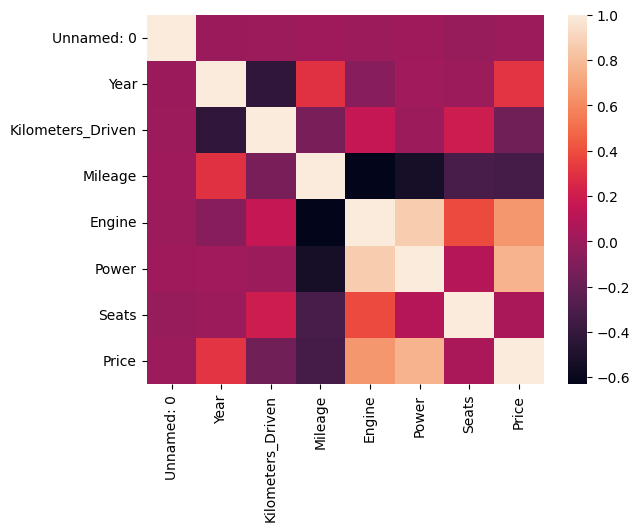

In [518]:
traincorr = train_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(traincorr)

In [519]:
'''
if we see the the table we can see that no of seats and km driven has no relation with price
also the engine is completely depended on power.
so we drop those
'''
train_data = train_data.drop(['Seats', 'Kilometers_Driven', 'Engine'], axis=1)

train_data

,Unnamed: 0,Year,Mileage,Power,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-1.740873,1.127269,1.316366,-0.546072,5.00,True,True,False,False,False
1,-1.739947,1.127269,0.068488,-0.251070,8.37,False,False,False,False,False
2,-1.739021,0.176632,-0.745549,-0.186170,4.50,True,True,False,False,False
3,-1.738094,-2.041520,-0.232403,-1.108418,0.85,False,True,False,True,False
4,-1.737168,-0.140247,0.658606,-0.458309,2.65,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
3745,1.728319,-1.407762,-1.678542,2.238006,18.75,False,False,False,False,False
3746,1.729245,-0.457125,-1.494276,0.117682,6.25,False,False,False,False,False
3747,1.730172,-2.041520,0.164119,-0.857667,1.45,True,True,False,False,False
3748,1.731098,0.176632,0.525654,-0.549759,6.60,False,True,False,False,False


In [520]:
## Prepare the x_train and y_train

In [521]:
X_train = train_data.drop('Price', axis=1).to_numpy(dtype=float)
Y_train = train_data['Price'].to_numpy(dtype=float)

X_train

array([[-1.74087337,  1.12726929,  1.31636588, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73994702,  1.12726929,  0.06848767, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73902066,  0.17663244, -0.74554877, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.73017169, -2.0415202 ,  0.16411946, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73109805,  0.17663244,  0.52565427, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.7320244 , -0.45712546,  0.16411946, ...,  0.        ,
         0.        ,  0.        ]])

In [522]:
Y_train

array([5.  , 8.37, 4.5 , ..., 1.45, 6.6 , 2.35])

In [523]:
## Taking the test data

In [524]:
test_data = pd.read_csv('Test.csv')
test_data = preprocess_data(test_data)

test_data

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,2013,84175,23.40,1248.0,74.00,5.0,6.95,False,True,False,False,False
1,1,2012,62282,16.95,1197.0,78.90,5.0,2.90,True,False,False,False,False
2,2,2017,37460,18.60,1197.0,81.86,5.0,6.28,True,True,False,False,False
3,3,2011,106976,13.50,2400.0,215.00,5.0,13.80,False,False,False,False,False
4,4,2013,60000,20.36,1197.0,78.90,5.0,2.75,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,2013,71000,22.70,1582.0,126.20,5.0,6.80,False,False,False,False,False
1246,1246,2005,91000,16.80,1341.0,83.00,5.0,0.80,True,True,False,False,True
1247,1247,2017,50534,17.21,1197.0,103.50,5.0,8.27,True,False,False,False,False
1248,1248,2012,83000,19.08,1582.0,126.32,5.0,6.00,False,False,False,False,False


In [525]:
## Standerising the test values

In [526]:
for feature in numerical_features:
    if feature in test_data.columns:
        test_data[feature] = (test_data[feature] - train_mean[feature]) / train_std[feature]

test_data

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-1.740873,-0.140247,0.657927,1.213737,-0.629943,-0.730448,-0.351374,6.95,False,True,False,False,False
1,-1.739947,-0.457125,0.115033,-0.290715,-0.714578,-0.640103,-0.351374,2.90,True,False,False,False,False
2,-1.739021,1.127269,-0.500493,0.094145,-0.714578,-0.585528,-0.351374,6.28,True,True,False,False,False
3,-1.738094,-0.774004,1.223338,-1.095421,1.281813,1.869254,-0.351374,13.80,False,False,False,False,False
4,-1.737168,-0.140247,0.058445,0.504662,-0.714578,-0.640103,-0.351374,2.75,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,-0.587564,-0.140247,0.331219,1.050463,-0.075666,0.231995,-0.351374,6.80,False,False,False,False,False
1246,-0.586637,-2.675278,0.827171,-0.325702,-0.475608,-0.564509,-0.351374,0.80,True,True,False,False,True
1247,-0.585711,1.127269,-0.176289,-0.230070,-0.714578,-0.186538,-0.351374,8.27,True,False,False,False,False
1248,-0.584785,-0.457125,0.628790,0.206104,-0.075666,0.234208,-0.351374,6.00,False,False,False,False,False


In [527]:
test_data = test_data.drop(['Seats', 'Kilometers_Driven', 'Engine'], axis=1)

test_data

,Unnamed: 0,Year,Mileage,Power,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-1.740873,-0.140247,1.213737,-0.730448,6.95,False,True,False,False,False
1,-1.739947,-0.457125,-0.290715,-0.640103,2.90,True,False,False,False,False
2,-1.739021,1.127269,0.094145,-0.585528,6.28,True,True,False,False,False
3,-1.738094,-0.774004,-1.095421,1.869254,13.80,False,False,False,False,False
4,-1.737168,-0.140247,0.504662,-0.640103,2.75,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1245,-0.587564,-0.140247,1.050463,0.231995,6.80,False,False,False,False,False
1246,-0.586637,-2.675278,-0.325702,-0.564509,0.80,True,True,False,False,True
1247,-0.585711,1.127269,-0.230070,-0.186538,8.27,True,False,False,False,False
1248,-0.584785,-0.457125,0.206104,0.234208,6.00,False,False,False,False,False


In [528]:
## Preparing X_test and y_test

In [529]:
X_test = test_data.drop('Price', axis=1).to_numpy(dtype=float)
Y_test = test_data['Price'].to_numpy(dtype=float)

X_test

array([[-1.74087337, -0.14024651,  1.21373665, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73994702, -0.45712546, -0.29071465, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73902066,  1.12726929,  0.09414498, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.58571105,  1.12726929, -0.2300701 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5847847 , -0.45712546,  0.20610415, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58385835,  1.76102719,  0.74724012, ...,  0.        ,
         0.        ,  0.        ]])

In [530]:
Y_test

array([6.95, 2.9 , 6.28, ..., 8.27, 6.  , 9.51])

In [531]:
# defining all the functions required for regressor

In [532]:
## Compute Cost

In [533]:
def compute_cost(features, target, weights, bias, reg_constant):
    num_samples = features.shape[0]
    predictions = np.dot(features, weights) + bias
    mse = np.mean((predictions - target) ** 2)
    reg_term = reg_constant * np.sum(weights ** 2) / num_samples
    return 0.5 * (mse + reg_term)

"""
This function taks in the 
    features in MxN matrix
    target in M
    weights in N
    bias (float)
    Regularization constant 

    This tells u the cost function
"""

'\nThis function taks in the \n    features in MxN matrix\n    target in M\n    weights in N\n    bias (float)\n    Regularization constant \n\n    This tells u the cost function\n'

In [534]:
## Computing Gradiants

In [544]:
def compute_gradients(features, target, weights, bias, reg_constant):
    num_samples = features.shape[0]
    errors = (np.dot(features, weights) + bias) - target
    bias_gradient = np.sum(errors) / num_samples
    weights_gradient = (np.dot(features.T, errors) + reg_constant * weights) / num_samples
    return bias_gradient, weights_gradient

In [545]:
## Gradiant Descent

In [546]:
def gradient_descent(features, target, init_weights, init_bias, learning_rate, num_iterations, reg_constant):
    weights = np.array(init_weights, dtype=float)
    bias = float(init_bias)
    cost_history = []

    for _ in range(num_iterations):
        bias_gradient, weights_gradient = compute_gradients(features, target, weights, bias, reg_constant)
        weights -= learning_rate * weights_gradient
        bias -= learning_rate * bias_gradient
        cost = compute_cost(features, target, weights, bias, reg_constant)
        cost_history.append(cost)

    return weights, bias, cost_history

"""
This function formulates the gradiant decent formulae
it takes in 
	features 
	target
	initial w
	initaial b
	alpha
	no of iterations
	regression constant
return the value of w b and the history of cost of the regressor
"""

'\nThis function formulates the gradiant decent formulae\nit takes in \n\tfeatures \n\ttarget\n\tinitial w\n\tinitaial b\n\talpha\n\tno of iterations\n\tregression constant\nreturn the value of w b and the history of cost of the regressor\n'

In [547]:
# Predict values

In [548]:
def predict(features, weights, bias):
    predictions = np.dot(features, weights) + bias
    predictions = np.maximum(predictions, 0)  # Ensure non-negative predictions
    return predictions
"""
this function is for predicting from the data
"""

'\nthis function is for predicting from the data\n'

In [549]:
def calculate_r_squared(actual, predicted):
    residual_sum_of_squares = np.sum((actual - predicted) ** 2)
    total_sum_of_squares = np.sum((actual - np.mean(actual)) ** 2)
    return 1 - (residual_sum_of_squares / total_sum_of_squares)

"""
this function returns the r-squred of the model
"""

'\nthis function returns the r-squred of the model\n'

In [550]:
# Training the model

In [591]:
initial_weights = np.zeros(X_train.shape[1], dtype=float)
initial_bias = 0.0
learning_rate = 0.01
num_iterations = 3000
regularization_constant = 10

initial_weights

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [592]:
optimized_weights, optimized_bias, cost_history = gradient_descent(
    X_train, Y_train, initial_weights, initial_bias, learning_rate, num_iterations, regularization_constant
)

"""
This calls the gradiant function
"""

'\nThis calls the gradiant function\n'

In [593]:
optimized_weights

array([ 5.57945049e-03,  3.28040675e+00, -6.09046666e-01,  7.21442818e+00,
       -1.97209127e+00, -2.42160921e+00,  3.33351469e-02, -9.62701576e-02,
        3.04768263e-01])

In [594]:
optimized_bias

np.float64(12.220210160435709)

In [595]:
# Testing the model

In [596]:
## Evaluate model using calling function

In [597]:
predictions_test = predict(X_test, optimized_weights, optimized_bias)
mean_square_error = np.mean((predictions_test - Y_test) ** 2)
root_mean_square_error = np.sqrt(mean_square_error)

In [598]:
mean_square_error

np.float64(36.77975584488763)

In [599]:
root_mean_square_error

np.float64(6.064631550629241)

In [600]:
## Calculate R-squared for training and testing data

In [601]:
r_squared_test = calculate_r_squared(Y_test, predictions_test)
r_squared_train = calculate_r_squared(Y_train, predict(X_train, optimized_weights, optimized_bias))
print(f"R-Squared (Test): {r_squared_test}")
print(f"R-Squared (Train): {r_squared_train}")

R-Squared (Test): 0.7053055317854736
R-Squared (Train): 0.7064135191368248


In [602]:
## Visualize predicted vs actual prices

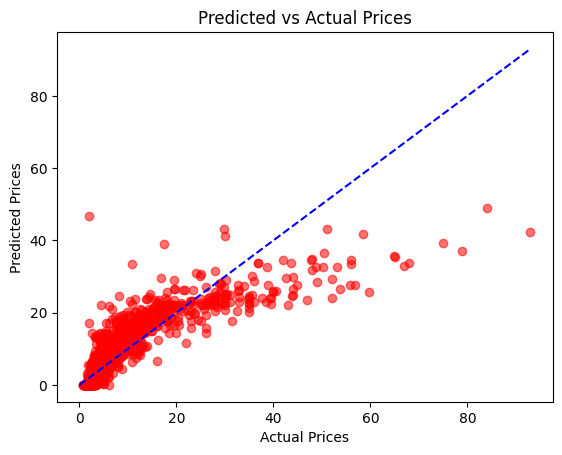

In [603]:
min_value = min(min(Y_test), min(predictions_test))
max_value = max(max(Y_test), max(predictions_test))

plt.plot([min_value, max_value], [min_value, max_value], color='blue', linestyle='--')

plt.scatter(Y_test, predictions_test, color='red', alpha=0.55)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

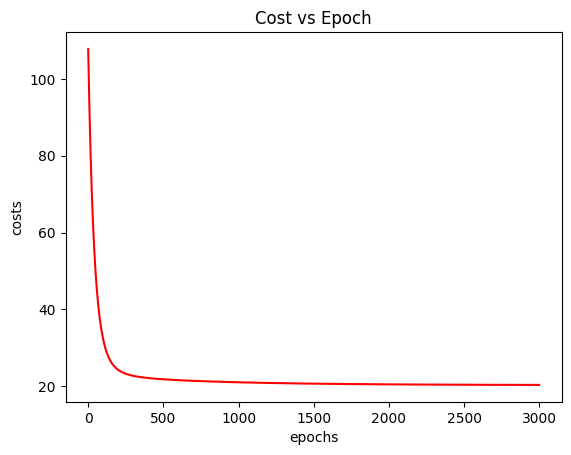

In [604]:
plt.plot(range(len(cost_history)),cost_history,color='red')
plt.ylabel('costs')
plt.xlabel('epochs')
plt.title('Cost vs Epoch')
plt.show()